In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
def pinv_solver(A, b):
    a_pinv = np.linalg.pinv(A)
    x = a_pinv.dot(b)
    return x

def thikonov_solver(A, b, alpha):
    x = np.linalg.solve(A.T.dot(A) + alpha*np.eye(A.T.shape[0]), A.T.dot(b))
    return x

def interp(X, C):
    Y = []
    for x in X:
        y = 0
        for i, c in enumerate(C):
            y += c*x**i
        Y.append(y)
    return np.asarray(Y)

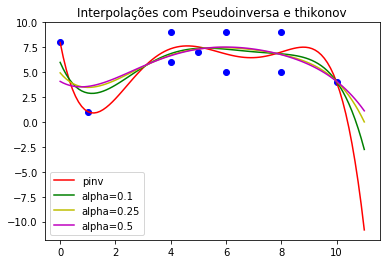

In [158]:
np.random.seed(0)
n_exp = 6
pts = np.round(np.random.rand(10,2)*10)
A = np.vander(pts[:,0], n_exp, increasing=True)
b = pts[:,1].reshape(-1, 1)

c_pinv = pinv_solver(A, b)
c_thik_1 = thikonov_solver(A, b, 0.1)
c_thik_25 = thikonov_solver(A, b, 0.25)
c_thik_5 = thikonov_solver(A, b, 0.5)

X = np.linspace(0, max(pts[:,0])+1, 100)

Y_pinv = interp(X, c_pinv)

Y_thik_1 = interp(X, c_thik_1)
Y_thik_25 = interp(X, c_thik_25)
Y_thik_5 = interp(X, c_thik_5)

plt.title('Interpolações com Pseudoinversa e thikonov')
plt.scatter(pts[:,0], pts[:,1], c='b')
plt.plot(X, Y_pinv, c='r', label='pinv')
plt.plot(X, Y_thik_1, c='g', label='alpha=0.1')
plt.plot(X, Y_thik_25, c='y', label='alpha=0.25')
plt.plot(X, Y_thik_5, c='m', label='alpha=0.5')

plt.legend(loc='lower left')
plt.show()

Foram utilizados 10 pontos e pode-se observar que a interpolação utilizando a pseudo-inversa tende a causar bastante overfitting, ou seja, conforme o grau do polinômio aumenta, menor é a capacidade de generalização. Já com a regularização de Thikonov esse problema demora mais a ocorrer. Além disso pode-se observar que conforme o alpha aumenta, mais a curva suaviza e tenta se aproximar de uma reta.

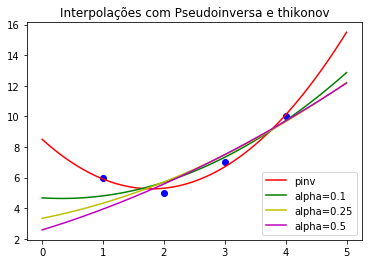

In [159]:
np.random.seed(0)
n_exp = 3
pts = np.array([[1, 6],
                [2, 5],
                [3, 7],
                [4, 10]], dtype=np.float32)
A = np.vander(pts[:,0], n_exp, increasing=True)
b = pts[:,1].reshape(-1, 1)

c_pinv = pinv_solver(A, b)
c_thik_1 = thikonov_solver(A, b, 0.1)
c_thik_25 = thikonov_solver(A, b, 0.25)
c_thik_5 = thikonov_solver(A, b, 0.5)

X = np.linspace(0, max(pts[:,0])+1, 100)

Y_pinv = interp(X, c_pinv)

Y_thik_1 = interp(X, c_thik_1)
Y_thik_25 = interp(X, c_thik_25)
Y_thik_5 = interp(X, c_thik_5)

plt.title('Interpolações com Pseudoinversa e thikonov')
plt.scatter(pts[:,0], pts[:,1], c='b')
plt.plot(X, Y_pinv, c='r', label='pinv')
plt.plot(X, Y_thik_1, c='g', label='alpha=0.1')
plt.plot(X, Y_thik_25, c='y', label='alpha=0.25')
plt.plot(X, Y_thik_5, c='m', label='alpha=0.5')

plt.legend(loc='lower right')
plt.show()

Foram utilizados 4 pontos e ocorre o mesmo que na situação anterior. Porém como o graudo polinômio é menor, fica mais facil de ver a curva usando a regularizaão com um alpha alto se aproximar bastante de uma reta.